In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Files/game.csv', parse_dates=['game_date'])
#sorted_df = df.sort_values(by='', ascending=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [3]:
df_games = df[df['season_type'].isin(['Regular Season', 'Playoffs'])]

In [4]:
df_games.insert(0,'game_year', df_games['game_date'].dt.year)
df_games

,game_year,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,1946,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,1946,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,1946,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,1946,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,1946,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,2023,42022,1610612743,DEN,Denver Nuggets,42200401,2023-06-01,DEN vs. MIA,W,240,40.0,79.0,0.506,8.0,27.0,0.296,16.0,20.0,0.800,6.0,39.0,45.0,29.0,4.0,4.0,10.0,8.0,104.0,11,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,39.0,96.0,0.406,13.0,39.0,0.333,2.0,2.0,1.000,11.0,32.0,43.0,26.0,5.0,4.0,8.0,15.0,93.0,-11,1,Playoffs
65692,2023,42022,1610612743,DEN,Denver Nuggets,42200402,2023-06-04,DEN vs. MIA,L,240,39.0,75.0,0.520,11.0,28.0,0.393,19.0,22.0,0.864,9.0,29.0,38.0,23.0,7.0,2.0,14.0,21.0,108.0,-3,1,1610612748,MIA,Miami Heat,MIA @ DEN,W,38.0,78.0,0.487,17.0,35.0,0.486,18.0,20.0,0.900,8.0,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,1,Playoffs
65693,2023,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,2023,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs


In [5]:
df_games = df_games[df_games['game_year']>=1950]

In [6]:
df_games[df_games.game_year>1985]

,game_year,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
19550,1986,21985,1610612757,POR,Portland Trail Blazers,28500362,1986-01-01,POR vs. PHL,L,265,53.0,91.0,0.582,0.0,3.0,0.000,13.0,24.0,0.542,15.0,17.0,32.0,26.0,17.0,1.0,20.0,29.0,119.0,-2,0,1610612755,PHL,Philadelphia 76ers,PHL @ POR,W,43.0,79.0,0.544,0.0,1.0,0.000,35.0,45.0,0.778,16.0,28.0,44.0,26.0,16.0,8.0,29.0,24.0,121.0,2,0,Regular Season
19551,1986,21985,1610612752,NYK,New York Knicks,28500365,1986-01-02,NYK vs. WAS,L,240,41.0,92.0,0.446,2.0,5.0,0.400,25.0,32.0,0.781,20.0,17.0,37.0,26.0,14.0,2.0,13.0,22.0,109.0,-6,0,1610612764,WAS,Washington Bullets,WAS @ NYK,W,49.0,80.0,0.613,1.0,2.0,0.500,16.0,18.0,0.889,10.0,25.0,35.0,38.0,8.0,13.0,19.0,22.0,115.0,6,0,Regular Season
19552,1986,21985,1610612758,SAC,Sacramento Kings,28500363,1986-01-02,SAC vs. SAN,W,240,46.0,86.0,0.535,0.0,2.0,0.000,22.0,27.0,0.815,9.0,26.0,35.0,32.0,10.0,3.0,18.0,32.0,114.0,8,0,1610612759,SAN,San Antonio Spurs,SAN @ SAC,L,38.0,75.0,0.507,0.0,2.0,0.000,30.0,35.0,0.857,8.0,24.0,32.0,13.0,8.0,6.0,23.0,29.0,106.0,-8,0,Regular Season
19553,1986,21985,1610612744,GOS,Golden State Warriors,28500366,1986-01-02,GOS vs. HOU,L,240,48.0,97.0,0.495,1.0,2.0,0.500,18.0,23.0,0.783,13.0,33.0,46.0,27.0,8.0,3.0,13.0,26.0,115.0,-5,0,1610612745,HOU,Houston Rockets,HOU @ GOS,W,48.0,92.0,0.522,0.0,2.0,0.000,24.0,35.0,0.686,13.0,32.0,45.0,25.0,4.0,7.0,17.0,22.0,120.0,5,0,Regular Season
19554,1986,21985,1610612754,IND,Indiana Pacers,28500367,1986-01-02,IND vs. BOS,L,240,42.0,81.0,0.519,0.0,2.0,0.000,20.0,26.0,0.769,14.0,31.0,45.0,25.0,6.0,0.0,23.0,26.0,104.0,-18,0,1610612738,BOS,Boston Celtics,BOS @ IND,W,49.0,89.0,0.551,2.0,3.0,0.667,22.0,27.0,0.815,10.0,25.0,35.0,29.0,16.0,6.0,11.0,25.0,122.0,18,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65691,2023,42022,1610612743,DEN,Denver Nuggets,42200401,2023-06-01,DEN vs. MIA,W,240,40.0,79.0,0.506,8.0,27.0,0.296,16.0,20.0,0.800,6.0,39.0,45.0,29.0,4.0,4.0,10.0,8.0,104.0,11,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,39.0,96.0,0.406,13.0,39.0,0.333,2.0,2.0,1.000,11.0,32.0,43.0,26.0,5.0,4.0,8.0,15.0,93.0,-11,1,Playoffs
65692,2023,42022,1610612743,DEN,Denver Nuggets,42200402,2023-06-04,DEN vs. MIA,L,240,39.0,75.0,0.520,11.0,28.0,0.393,19.0,22.0,0.864,9.0,29.0,38.0,23.0,7.0,2.0,14.0,21.0,108.0,-3,1,1610612748,MIA,Miami Heat,MIA @ DEN,W,38.0,78.0,0.487,17.0,35.0,0.486,18.0,20.0,0.900,8.0,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,1,Playoffs
65693,2023,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,2023,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs


In [7]:
df_games = df_games.drop(['team_id_home','video_available_home','team_abbreviation_away','matchup_away'], axis=1)

In [8]:
df_games = df_games.drop(df_games[df_games['game_year']<=1985].index)

In [9]:
#faça uma função que some a pontuação em casa e fora de casa

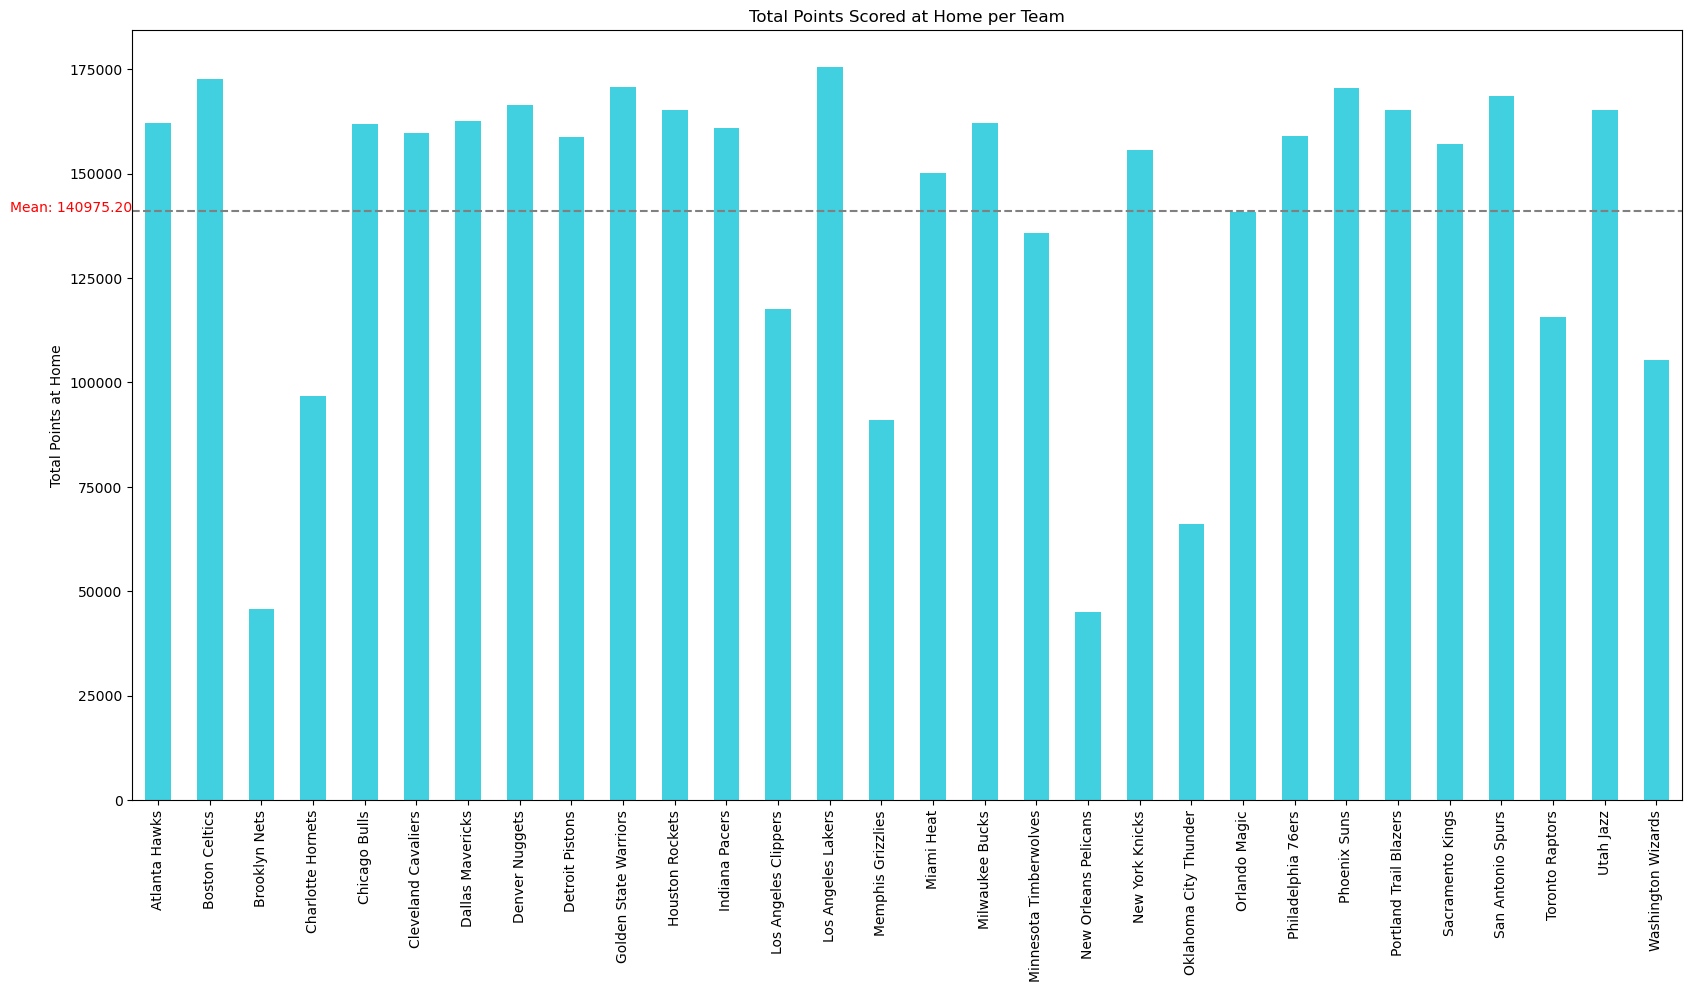

In [13]:
# Aggregate the data by summing points scored at home per team
df_all_teams = pd.read_csv('Files/team.csv')
mask = df_games['team_name_home'].isin(df_all_teams['full_name'])
df_filtered = df_games[mask]
plt.figure(figsize=(20, 10))
points_per_team = df_filtered.groupby('team_name_home')['pts_home'].sum()
points_per_team.plot(kind='bar', color='#40d0e0', width=0.5)

# Mean
mean_points = points_per_team.mean()
# Plot the mean as a horizontal line
plt.axhline(mean_points, color='gray', linestyle='--', label='Mean')
plt.text(-0.5, mean_points + 1, f'Mean: {mean_points:.2f}', color='red', ha='right')


# Set y-axis limit to include mean value
#plt.ylim(0, mean_points * 1.2)

plt.xlabel('')

# Add labels and title
plt.ylabel('Total Points at Home')
plt.title('Total Points Scored at Home per Team')

'''
Generate random colors for each unique team

team_colors = {team: np.random.rand(3,) for team in unique_teams}
points_per_team = df_games.groupby('team_name_home')['pts_home'].sum()

Create a bar plot with random colors

points_per_team.plot(kind='bar', color=[team_colors[team] for team in points_per_team.index])'''

plt.show()

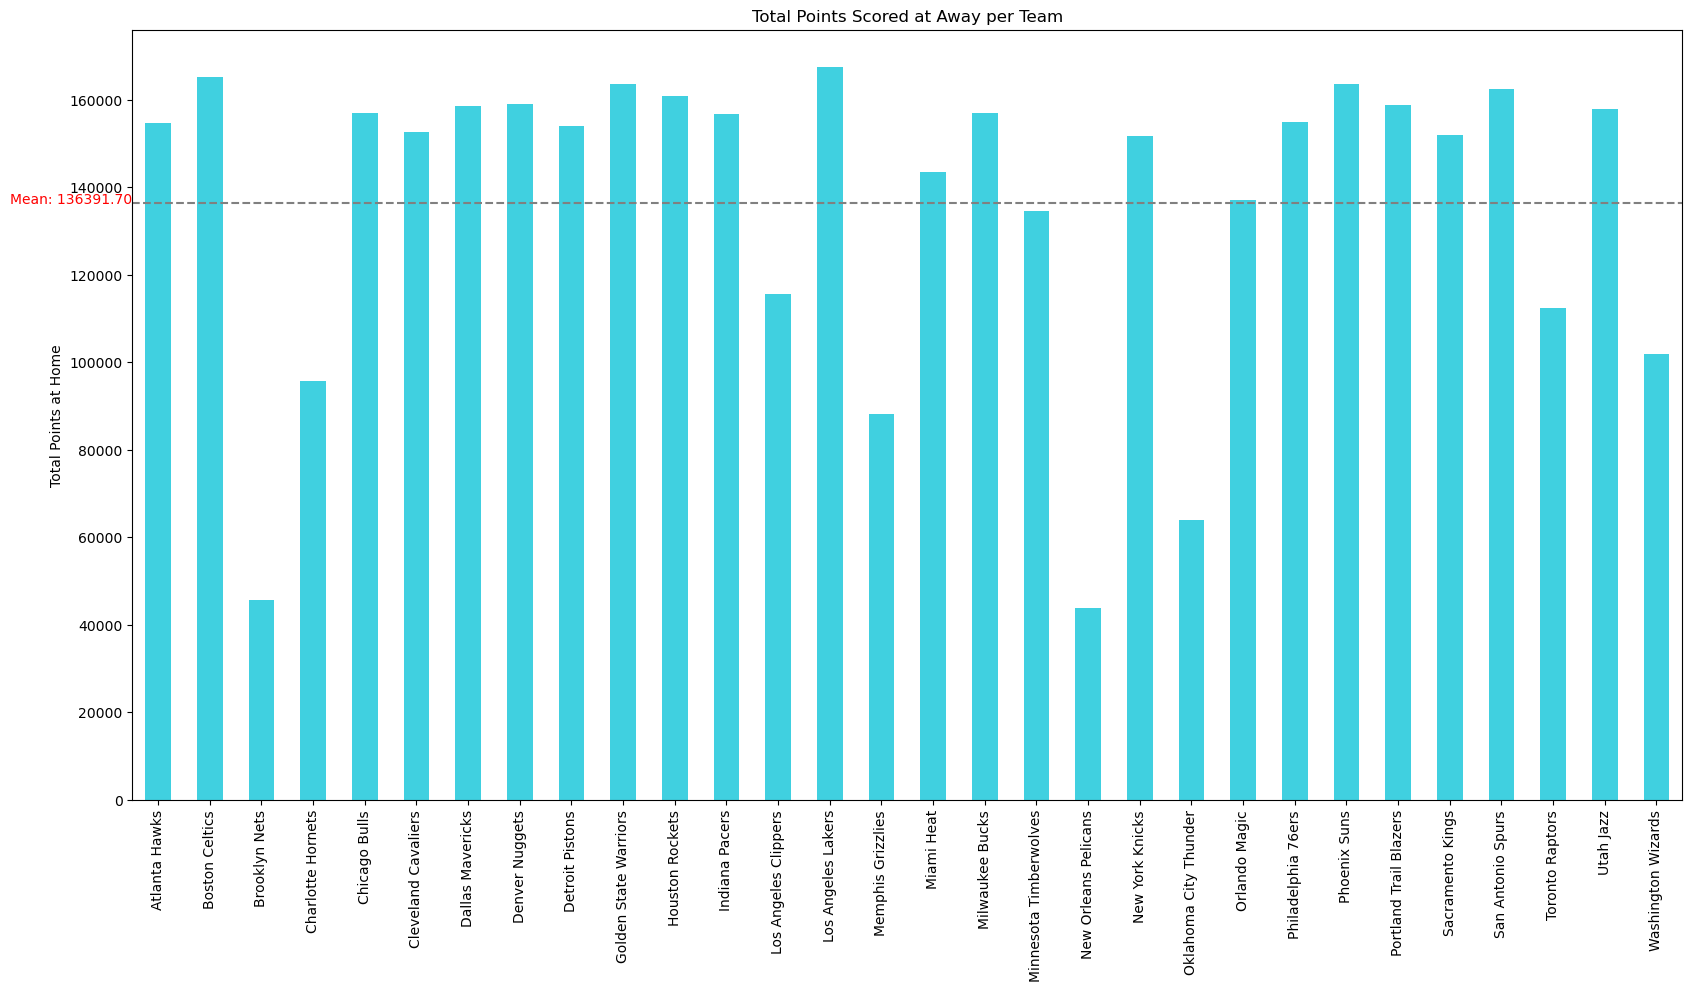

In [14]:
# Aggregate the data by summing points scored at home per team
mask = df_games['team_name_away'].isin(df_all_teams['full_name'])
df_filtered = df_games[mask]
plt.figure(figsize=(20, 10))
points_per_team = df_filtered.groupby('team_name_away')['pts_away'].sum()
points_per_team.plot(kind='bar', color='#40d0e0', width=0.5)

# Mean
mean_points = points_per_team.mean()
# Plot the mean as a horizontal line
plt.axhline(mean_points, color='gray', linestyle='--', label='Mean')
plt.text(-0.5, mean_points + 1, f'Mean: {mean_points:.2f}', color='red', ha='right')


# Set y-axis limit to include mean value
#plt.ylim(0, mean_points * 1.2)

plt.xlabel('')

# Add labels and title
plt.ylabel('Total Points at Home')
plt.title('Total Points Scored at Away per Team')

plt.show()

Text(0.5, 1.0, 'Total Points Scored per Team')

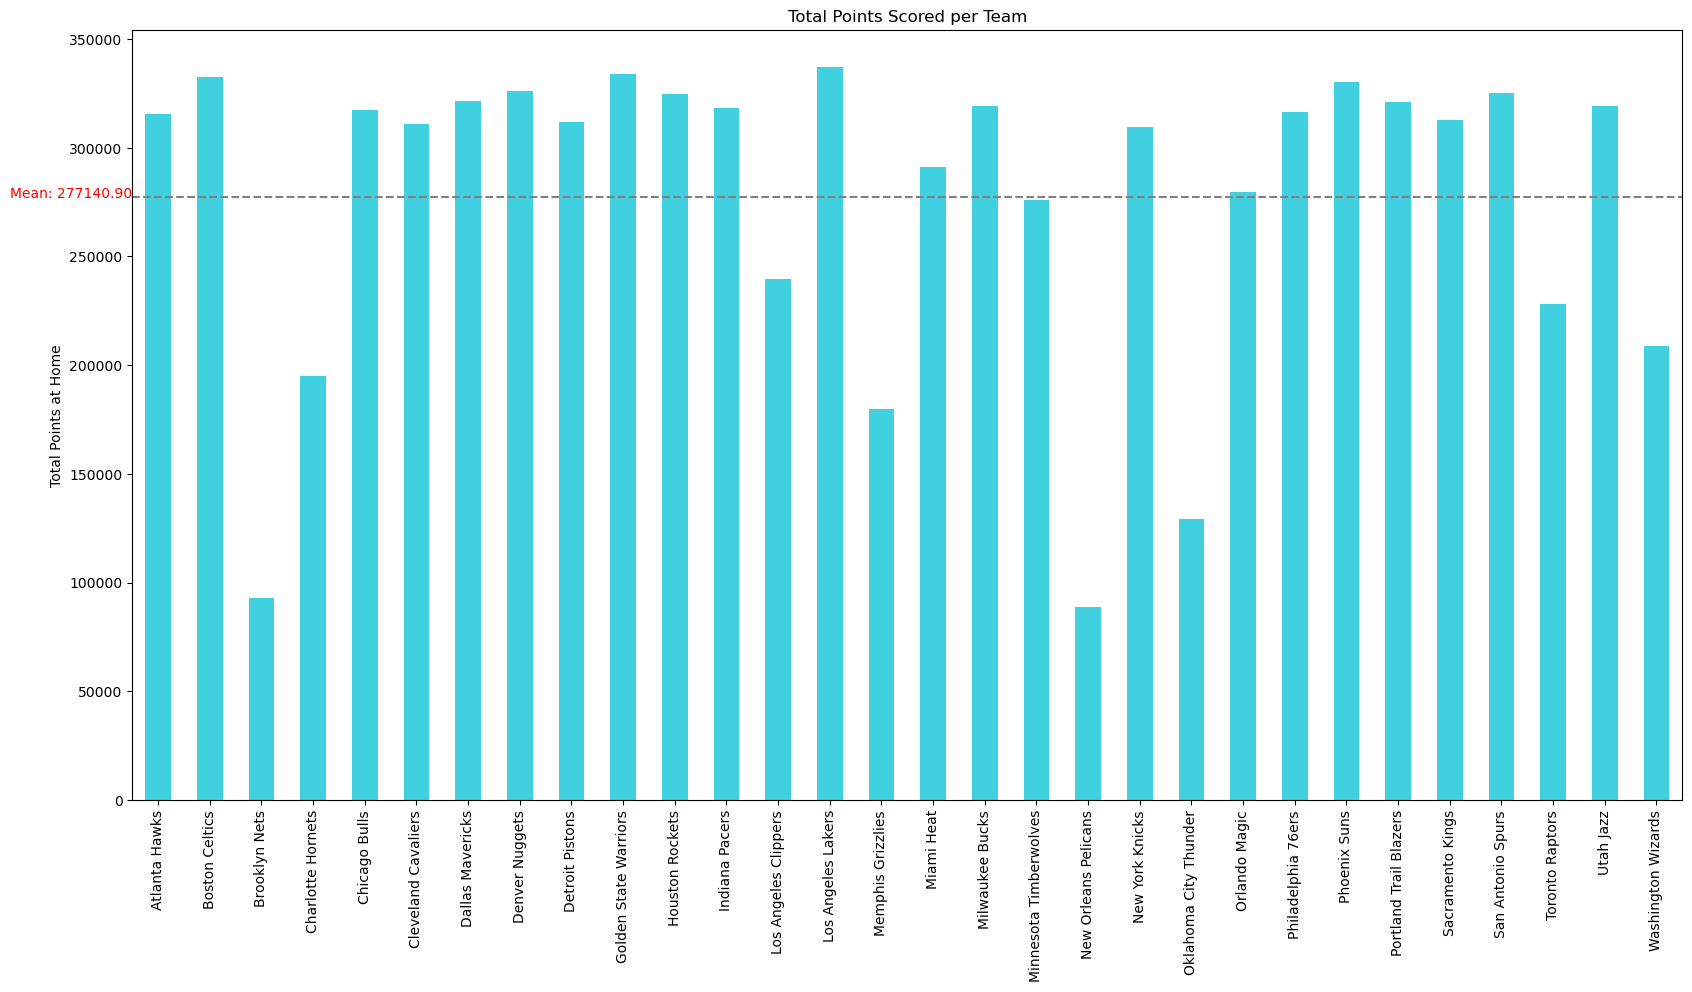

In [15]:
# Aggregate the data by summing points scored at home per team
mask = df_games['team_name_away'].isin(df_all_teams['full_name'])
df_filtered = df_games[mask]

plt.figure(figsize=(20, 10))
points_per_team_away = df_filtered.groupby('team_name_away')['pts_away'].sum()
points_per_team_home = df_filtered.groupby('team_name_away')['pts_home'].sum()
total_points = points_per_team_home.add(points_per_team_away, fill_value=0)

total_points.plot(kind='bar', color='#40d0e0', width=0.5)

# Mean
mean_points = total_points.mean()
# Plot the mean as a horizontal line
plt.axhline(mean_points, color='gray', linestyle='--', label='Mean')
plt.text(-0.5, mean_points + 1, f'Mean: {mean_points:.2f}', color='red', ha='right')


# Set y-axis limit to include mean value
#plt.ylim(0, mean_points * 1.2)

plt.xlabel('')

# Add labels and title
plt.ylabel('Total Points at Home')
plt.title('Total Points Scored per Team')

In [47]:
pd.set_option('display.max_columns',None)

df_3pts = pd.read_csv('Files/game.csv', parse_dates=['game_date'])
df_3pts.shape


(65698, 55)

In [48]:
df_3pts=df_3pts[df_3pts['season_type'].isin(['Regular Season','Playoffs'])]
df_3pts.shape

(64034, 55)

In [49]:
df_3pts = df_3pts.loc[:,['game_date', 'pts_home', 'pts_away', 'fg3m_home', 'fg3a_home', 'fg3m_away', 'fg3a_away']]
df_3pts.head()

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946-11-01,66.0,68.0,NaN,NaN,NaN,NaN
1,1946-11-02,56.0,51.0,NaN,NaN,NaN,NaN
2,1946-11-02,59.0,53.0,NaN,NaN,NaN,NaN
3,1946-11-02,63.0,47.0,NaN,NaN,NaN,NaN
4,1946-11-02,33.0,50.0,NaN,NaN,NaN,NaN


In [50]:
df_3pts.insert(0, 'game_year', df_3pts['game_date'].dt.year)
df_3pts = df_3pts.drop('game_date', axis=1)
df_3pts.head()

,game_year,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946,66.0,68.0,NaN,NaN,NaN,NaN
1,1946,56.0,51.0,NaN,NaN,NaN,NaN
2,1946,59.0,53.0,NaN,NaN,NaN,NaN
3,1946,63.0,47.0,NaN,NaN,NaN,NaN
4,1946,33.0,50.0,NaN,NaN,NaN,NaN


In [51]:
df_3pts.insert(3, 'total_score', df_3pts['pts_home'] + df_3pts['pts_away'])
df_3pts = df_3pts.drop(['pts_home','pts_away'],axis=1)
df_3pts.head()

,game_year,total_score,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946,134.0,NaN,NaN,NaN,NaN
1,1946,107.0,NaN,NaN,NaN,NaN
2,1946,112.0,NaN,NaN,NaN,NaN
3,1946,110.0,NaN,NaN,NaN,NaN
4,1946,83.0,NaN,NaN,NaN,NaN


In [52]:
df_3pts['fg3_made'] = df_3pts['fg3m_home'] + df_3pts['fg3m_away']
df_3pts['fg3_attempts'] = df_3pts['fg3a_home'] + df_3pts['fg3a_away']
df_3pts['fg3_pct'] = df_3pts['fg3_made'] / df_3pts['fg3_attempts']
df_3pts = df_3pts.drop(['fg3m_home', 'fg3m_away', 'fg3a_home', 'fg3a_away'], axis=1)
df_3pts.head()

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
0,1946,134.0,NaN,NaN,NaN
1,1946,107.0,NaN,NaN,NaN
2,1946,112.0,NaN,NaN,NaN
3,1946,110.0,NaN,NaN,NaN
4,1946,83.0,NaN,NaN,NaN


In [53]:
df_3pts.sort_values('fg3_pct', ascending=False)

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
18710,1985,231.0,2.0,0.0,inf
18486,1984,205.0,2.0,2.0,1.0
17966,1984,233.0,1.0,1.0,1.0
15776,1982,211.0,3.0,3.0,1.0
19696,1986,235.0,2.0,2.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


In [54]:
df_3pts.query('fg3_attempts < fg3_made')

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
18710,1985,231.0,2.0,0.0,inf


In [55]:
df_3pts = df_3pts.drop(df_3pts.query('fg3_attempts < fg3_made').index)
df_3pts.sort_values('fg3_pct', ascending=False)

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
20030,1986,239.0,2.0,2.0,1.0
18486,1984,205.0,2.0,2.0,1.0
22351,1988,216.0,2.0,2.0,1.0
23835,1990,192.0,3.0,3.0,1.0
20032,1986,225.0,1.0,1.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


In [56]:
df_years = df_3pts.groupby('game_year')['total_score'].mean()
df_years

game_year
1946    129.507812
1947    140.691525
1948    151.726644
1949    160.364211
1950    161.536346
1951    167.581717
1952    169.768595
1953    161.061111
1954    168.523364
1955    190.450980
1956    198.033742
1957    207.821656
1958    211.658537
1959    223.377104
1960    232.568421
1962    229.412371
1963    226.673684
1964    221.646465
1965    225.192737
1966    231.089286
1967    231.650190
1968    229.176056
1969    227.694301
1970    233.973607
1971    216.726027
1972    217.723666
1973    214.220430
1974    207.080444
1975    205.934599
1976    207.160000
1977    215.342723
1978    218.596923
1979    218.822695
1980    216.603696
1981    215.030752
1982    217.982072
1983    218.332659
1984    219.486434
1985    222.495069
1986    219.303371
1987    219.569827
1988    216.425752
1989    215.575379
1990    214.942616
1991    210.715372
1992    210.912816
1993    206.744342
1994    203.879170
1995    201.912439
1996    194.978351
1997    193.483360
1998    190.983274
19

<Axes: title={'center': 'NBA: Average Total Points per Game'}, xlabel='game_year'>

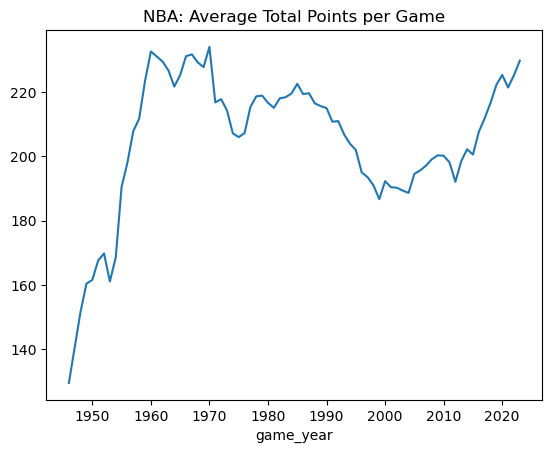

In [57]:
df_years.plot(title='NBA: Average Total Points per Game')


In [58]:
df3pts = df_3pts.dropna(subset = ['fg3_made', 'fg3_attempts', 'fg3_pct'])
df3pts.head()

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
14165,1980,211.0,0.0,2.0,0.0
14166,1980,211.0,0.0,2.0,0.0
14167,1980,212.0,1.0,5.0,0.2
14169,1980,211.0,0.0,3.0,0.0
14170,1980,230.0,0.0,8.0,0.0


In [59]:
df_3made = df3pts.groupby('game_year')['fg3_made'].mean()
df_3made.head()

game_year
1980    0.200000
1981    0.833333
1982    1.268116
1983    1.121212
1984    1.147368
Name: fg3_made, dtype: float64

<Axes: title={'center': 'NBA: Total 3-Point Shots Made Per Game'}, xlabel='game_year'>

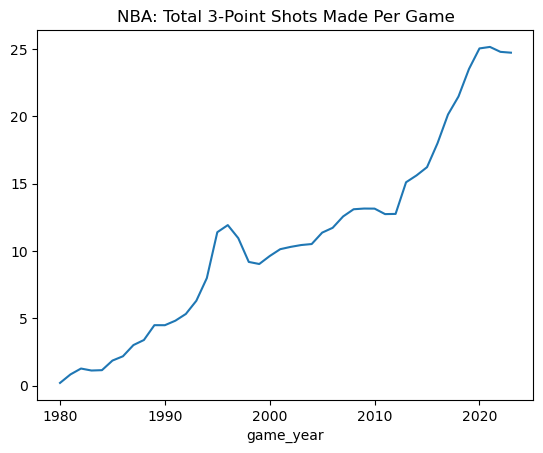

In [60]:
df_3made.plot(title='NBA: Total 3-Point Shots Made Per Game')

In [61]:
df_3attempts = df3pts.groupby('game_year')['fg3_attempts'].mean()
df_3attempts.head()

game_year
1980    4.000000
1981    3.708333
1982    4.884058
1983    4.494949
1984    4.736842
Name: fg3_attempts, dtype: float64

<Axes: title={'center': 'NBA: Total 3-Point Shots Attempted Per Game'}, xlabel='game_year'>

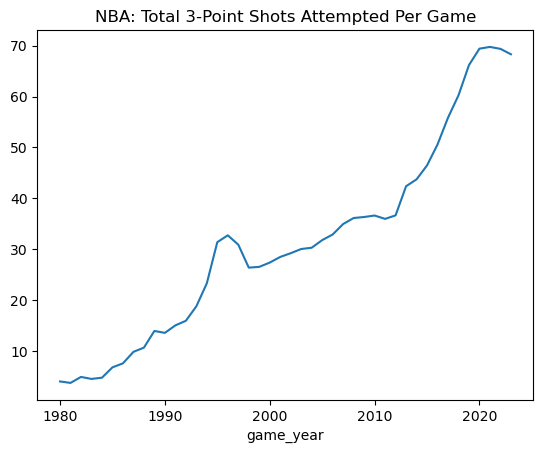

In [62]:
df_3attempts.plot(title='NBA: Total 3-Point Shots Attempted Per Game')

In [63]:
df_3made_attempts = pd.DataFrame({
    'Shots Made': df_3made,
    'Shots Attempted': df_3attempts
})
df_3made_attempts.head(10)

,Shots Made,Shots Attempted
game_year,,
1980,0.200000,4.000000
1981,0.833333,3.708333
1982,1.268116,4.884058
1983,1.121212,4.494949
1984,1.147368,4.736842
1985,1.860465,6.769556
1986,2.179197,7.553038
1987,3.011224,9.814286
1988,3.387582,10.646284


<Axes: title={'center': 'NBA: Average 3-Point Shots Per Game'}, xlabel='game_year'>

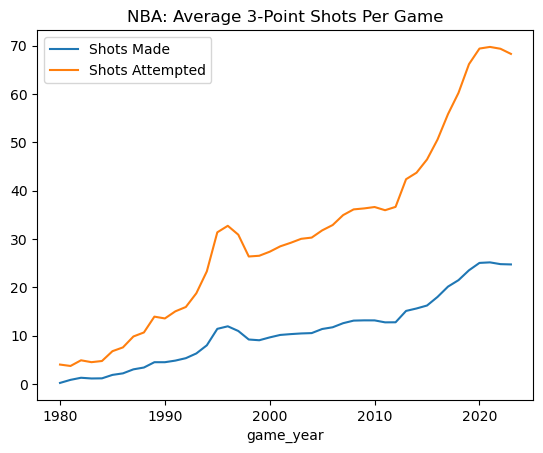

In [64]:
df_3made_attempts.plot(title='NBA: Average 3-Point Shots Per Game')

In [66]:
df_3pct = df3pts.groupby('game_year')['fg3_pct'].mean()
df_3pct.head()

game_year
1980    0.040000
1981    0.222884
1982    0.234610
1983    0.232600
1984    0.214816
Name: fg3_pct, dtype: float64

<Axes: title={'center': 'NBA: 3-Point Shots Hit Percentage Per Game'}, xlabel='game_year'>

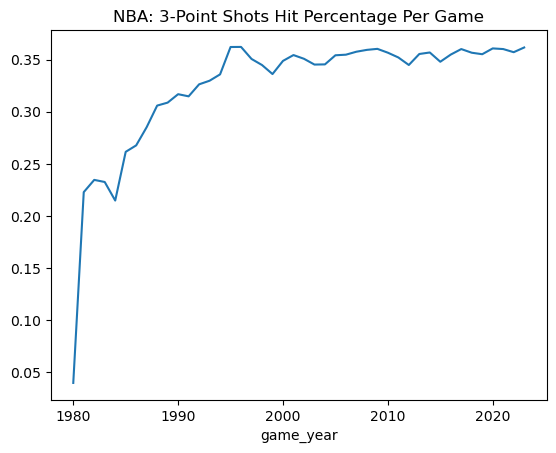

In [67]:
df_3pct.plot(title='NBA: 3-Point Shots Hit Percentage Per Game')

In [72]:
df_players = pd.read_csv('Files/common_player_info.csv')
df_players

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240.0,5.0,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225.0,20.0,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,San Jose State/France,6-6,235.0,7.0,9,Forward-Guard,Inactive,N,1610612758,Kings,SAC,kings,Sacramento,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245.0,13.0,3,Forward,Inactive,N,1610612763,Grizzlies,VAN,grizzlies,Vancouver,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,Indiana/USA,6-7,220.0,5.0,5,Forward,Inactive,N,1610612744,Warriors,GOS,warriors,Golden State,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18 00:00:00,Bayern Munich,Germany,Bayern Munich/Germany,6-8,226.0,2.0,16,Forward,Inactive,N,1610612741,Bulls,CHI,bulls,Chicago,paul_zipser,2016.0,2017.0,Y,Y,Y,2016,2,48,N
4167,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04 00:00:00,Darussafaka,Croatia,Darussafaka/Croatia,6-10,266.0,4.0,41,Center,Inactive,N,1610612739,Cavaliers,CLE,cavaliers,Cleveland,ante_zizic,2017.0,2019.0,Y,Y,Y,2016,1,23,N
4168,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30 00:00:00,Kent State,USA,Kent State/USA,7-1,240.0,1.0,34,Center,Inactive,N,1610612765,Pistons,DET,pistons,Detroit,HISTADD_jim_zoet,1982.0,1982.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N
4169,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18 00:00:00,Mega Basket,Croatia,Mega Basket/Croatia,7-0,240.0,7.0,40,Center,Active,N,1610612746,Clippers,LAC,clippers,LA,ivica_zubac,2016.0,2023.0,Y,Y,Y,2016,2,32,N


In [74]:
df_players['last_affiliation'].unique()

array(['Duke/USA', 'UCLA/USA', 'San Jose State/France', 'California/USA',
       'Indiana/USA', 'Western Kentucky/USA', 'Salem/USA',
       'FC Barcelona/Spain', 'Memphis/Nigeria', 'Pepperdine/USA',
       'Long Island-Brooklyn/USA', 'Oral Roberts/USA', 'Hillsdale/USA',
       'Baylor/USA', 'Oklahoma/USA', 'Northwestern/USA', 'Arizona/USA',
       'St. Bonaventure/USA', 'Boston College/USA',
       'Pittsburgh/New Zealand', 'Syracuse/USA', 'Kentucky/USA',
       'Louisville/South Sudan', 'Loyola-Marymount/USA',
       'Connecticut/USA', 'Kansas/USA', 'Michigan State/USA',
       'DePaul/USA', 'Missouri State/USA', 'Hyeres-Toulon/France',
       'Morehead State/USA', 'California State-Fullerton/USA',
       'Illinois State/Trinidad and Tobago', 'Florida State/Nigeria',
       'Fresno State/USA', 'Loyola-Maryland/Spain', 'Galatasaray/Turkey',
       'Texas-Austin/USA', 'Virginia/USA', 'West Virginia/USA',
       'Tennessee/Canada', 'Creighton/USA', 'Iowa State/USA',
       'Virginia Tech

In [81]:
new_df = df_players[df_players['greatest_75_flag'] == 'Y']

# Print the new DataFrame
subset = new_df.loc[:, ['display_first_last', 'school', 'position', 'height', 'weight', 'country', 'season_exp','draft_year', 'draft_round','draft_number']]
subset

,display_first_last,school,position,height,weight,country,season_exp,draft_year,draft_round,draft_number
1,Kareem Abdul-Jabbar,UCLA,Center,7-2,225.0,USA,20.0,1969,1,1
97,Giannis Antetokounmpo,Filathlitikos,Forward,7-0,243.0,Greece,10.0,2013,1,15
100,Carmelo Anthony,Syracuse,Forward,6-7,238.0,USA,20.0,2003,1,3
108,Nate Archibald,Texas-El Paso,Guard,6-1,150.0,USA,13.0,1970,2,19
114,Paul Arizin,Villanova,Forward,6-4,190.0,USA,10.0,1950,NaN,NaN
189,Charles Barkley,Auburn,Forward,6-6,252.0,USA,16.0,1984,1,5
211,Rick Barry,Miami,Forward,6-7,205.0,USA,10.0,1965,1,2
230,Elgin Baylor,Seattle,Forward,6-5,225.0,USA,14.0,1958,1,1
297,Larry Bird,Indiana State,Forward,6-9,220.0,USA,13.0,1978,1,6
502,Kobe Bryant,Lower Merion HS (PA),Forward-Guard,6-6,212.0,USA,20.0,1996,1,13


<Axes: xlabel='school'>

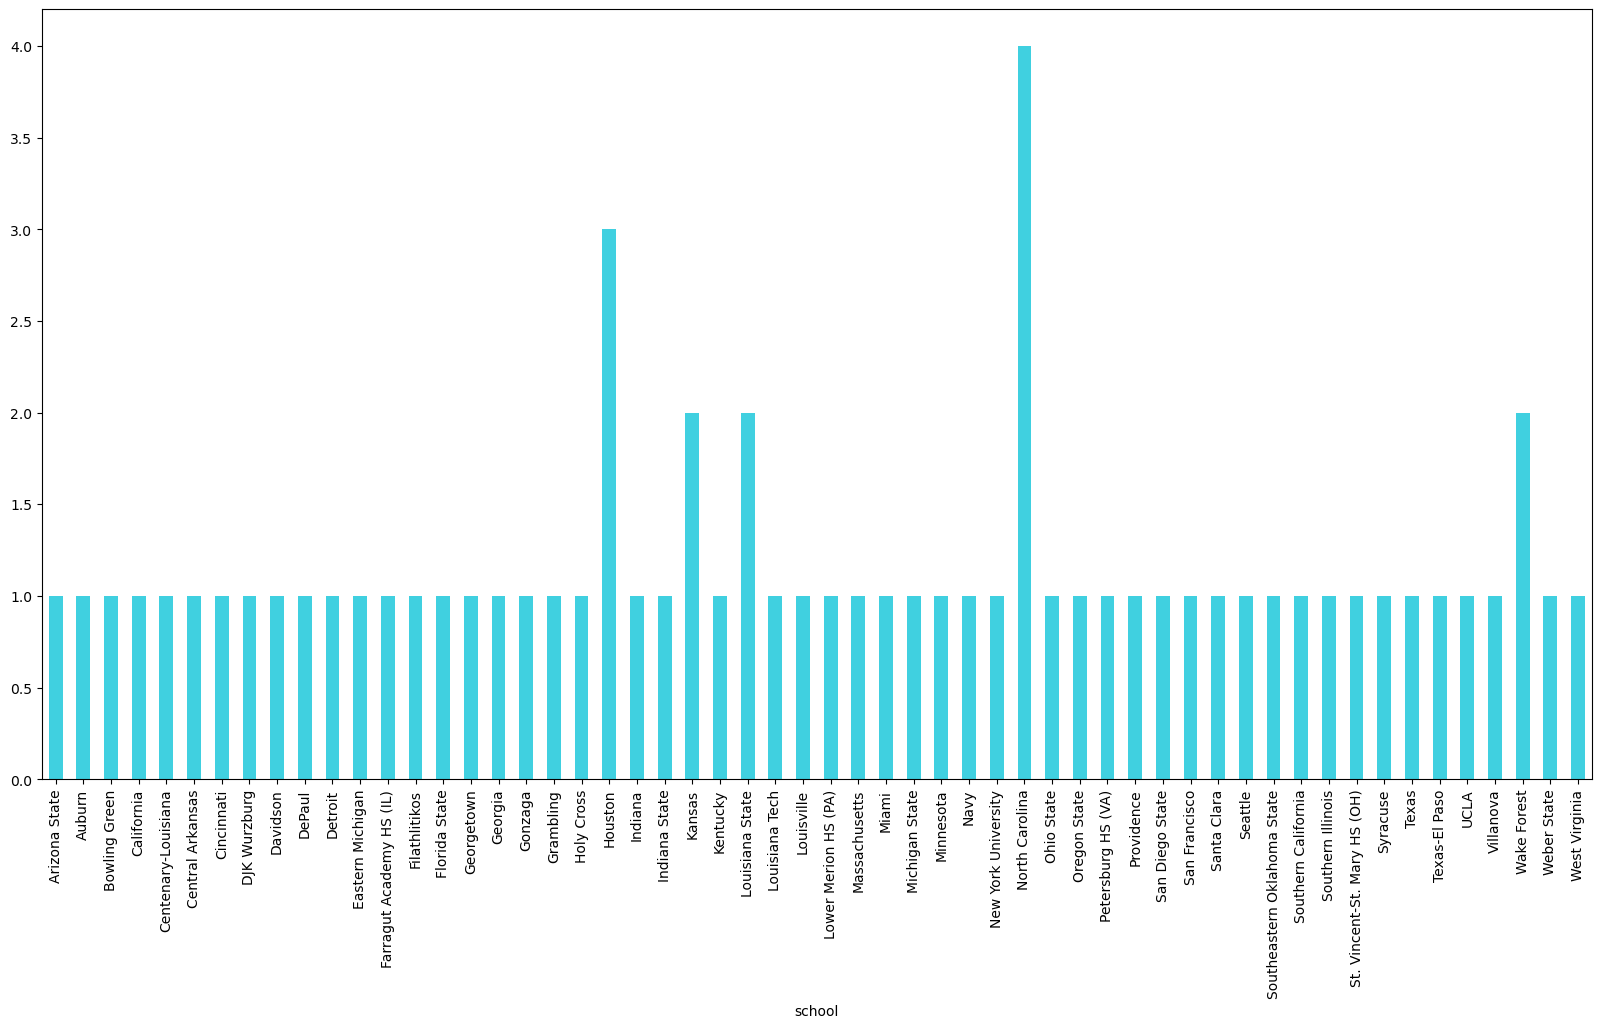

In [86]:
plt.figure(figsize=(20, 10))
school_75 = subset.groupby('school').value_counts()
school_counts = subset.groupby('school').size()
school_counts.plot(kind='bar', color='#40d0e0', width=0.5)

<Axes: xlabel='position'>

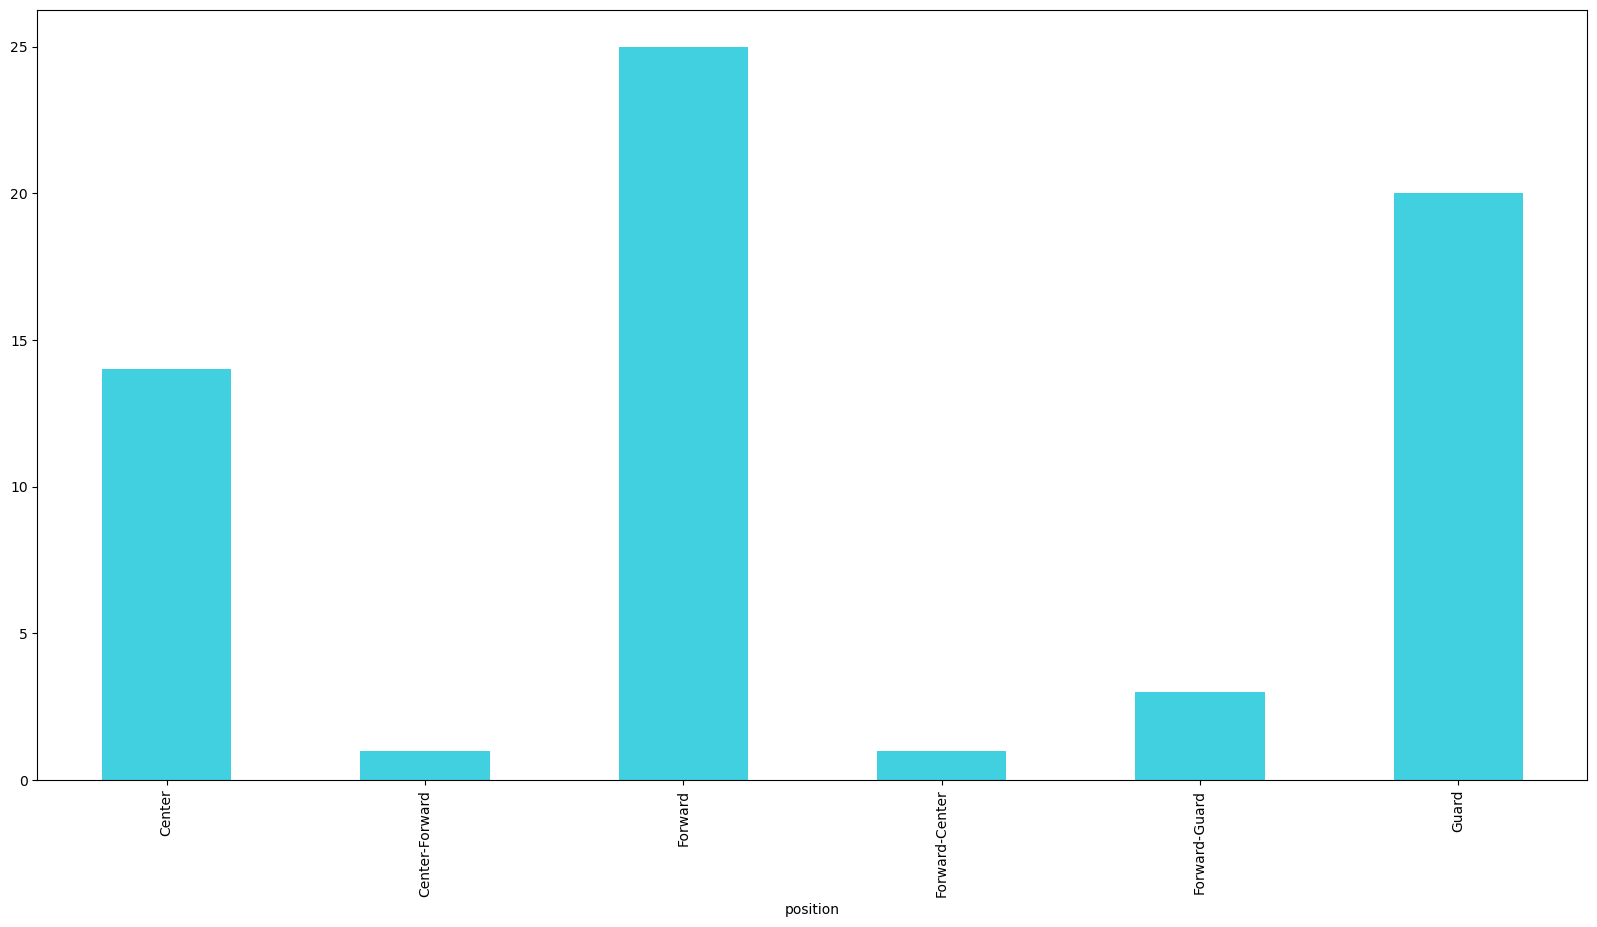

In [87]:
plt.figure(figsize=(20, 10))
position_counts = subset.groupby('position').size()
position_counts.plot(kind='bar', color='#40d0e0', width=0.5)

In [117]:
df_years = subset.loc[:,['position','draft_year']]

In [118]:
df_years['draft_year'] = pd.to_datetime(df_years['draft_year'], format='%Y', errors='coerce')
#df_years.insert(0, 'game_year', df_3pts['game_date'].dt.year)
#df_3pts = df_3pts.drop('game_date', axis=1)
#df_3pts.head()

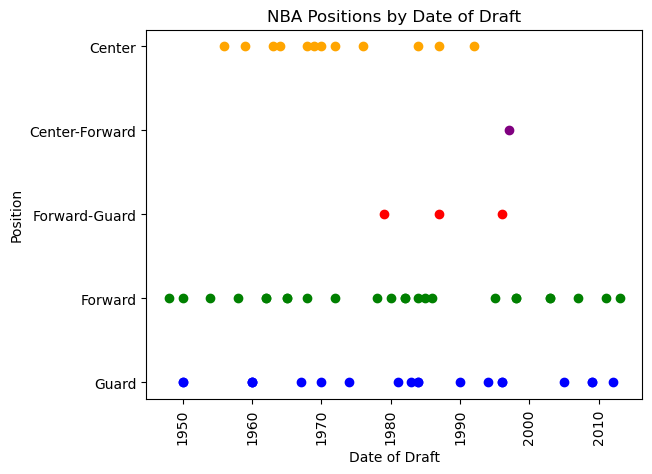

In [119]:
df_years = df_years.sort_values(by='draft_year')
# Define colors for each position
position_colors = {'Guard': 'blue', 'Forward': 'green', 'Forward-Guard': 'red', 'Center-Forward': 'purple', 'Center': 'orange'}

# Plot positions by date
for position, color in position_colors.items():
    position_data = df_years[df_years['position'] == position]
    plt.scatter(position_data['draft_year'], position_data['position'], color=color, label=position)
    

plt.xlabel('Date of Draft')
plt.ylabel('Position')
plt.title('NBA Positions by Date of Draft')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show() 

In [115]:
sorted_df = df_years.sort_values(by='draft_year', ascending=False)

,position,draft_year
97,Forward,2013-01-01
843,Forward-Center,2012-01-01
2224,Guard,2012-01-01
2198,Forward,2011-01-01
816,Guard,2009-01-01
1506,Guard,2009-01-01
1008,Forward,2007-01-01
2896,Guard,2005-01-01
100,Forward,2003-01-01
1816,Forward,2003-01-01
